In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Load Dataset

In [2]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# EDA (Exploratory Data Analysis)

In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



 mu = 180921.20 and sigma = 79415.29



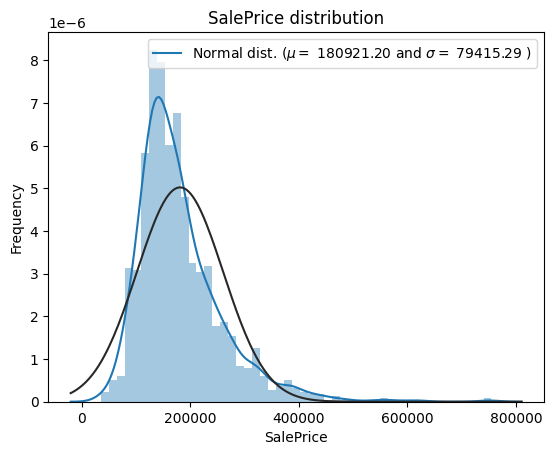

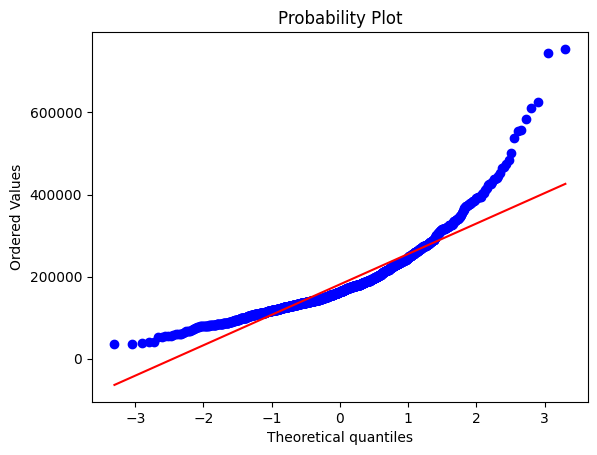

In [5]:
from scipy import stats
from scipy.stats import norm

sns.distplot(df_train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [6]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Skew and kurt
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282



 mu = 12.02 and sigma = 0.40



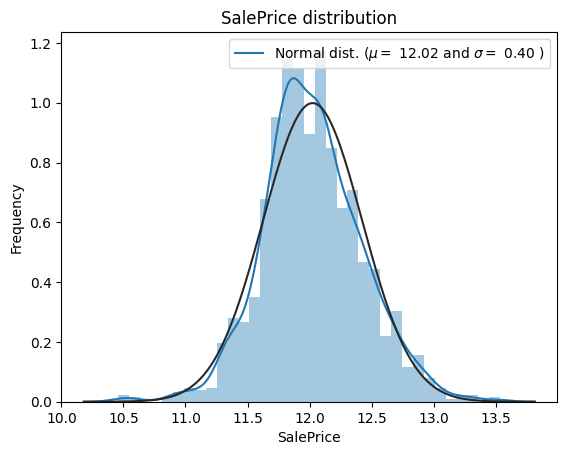

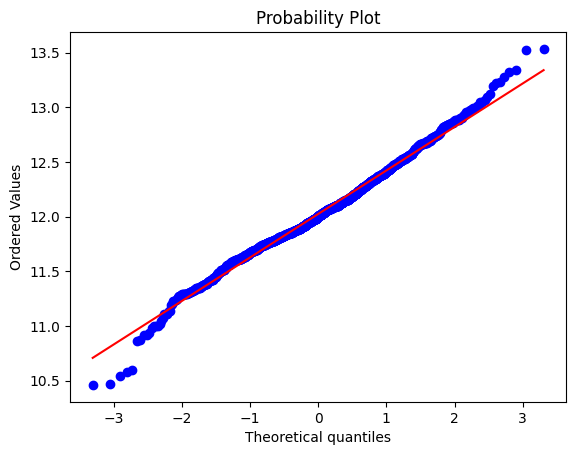

In [7]:
#Use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

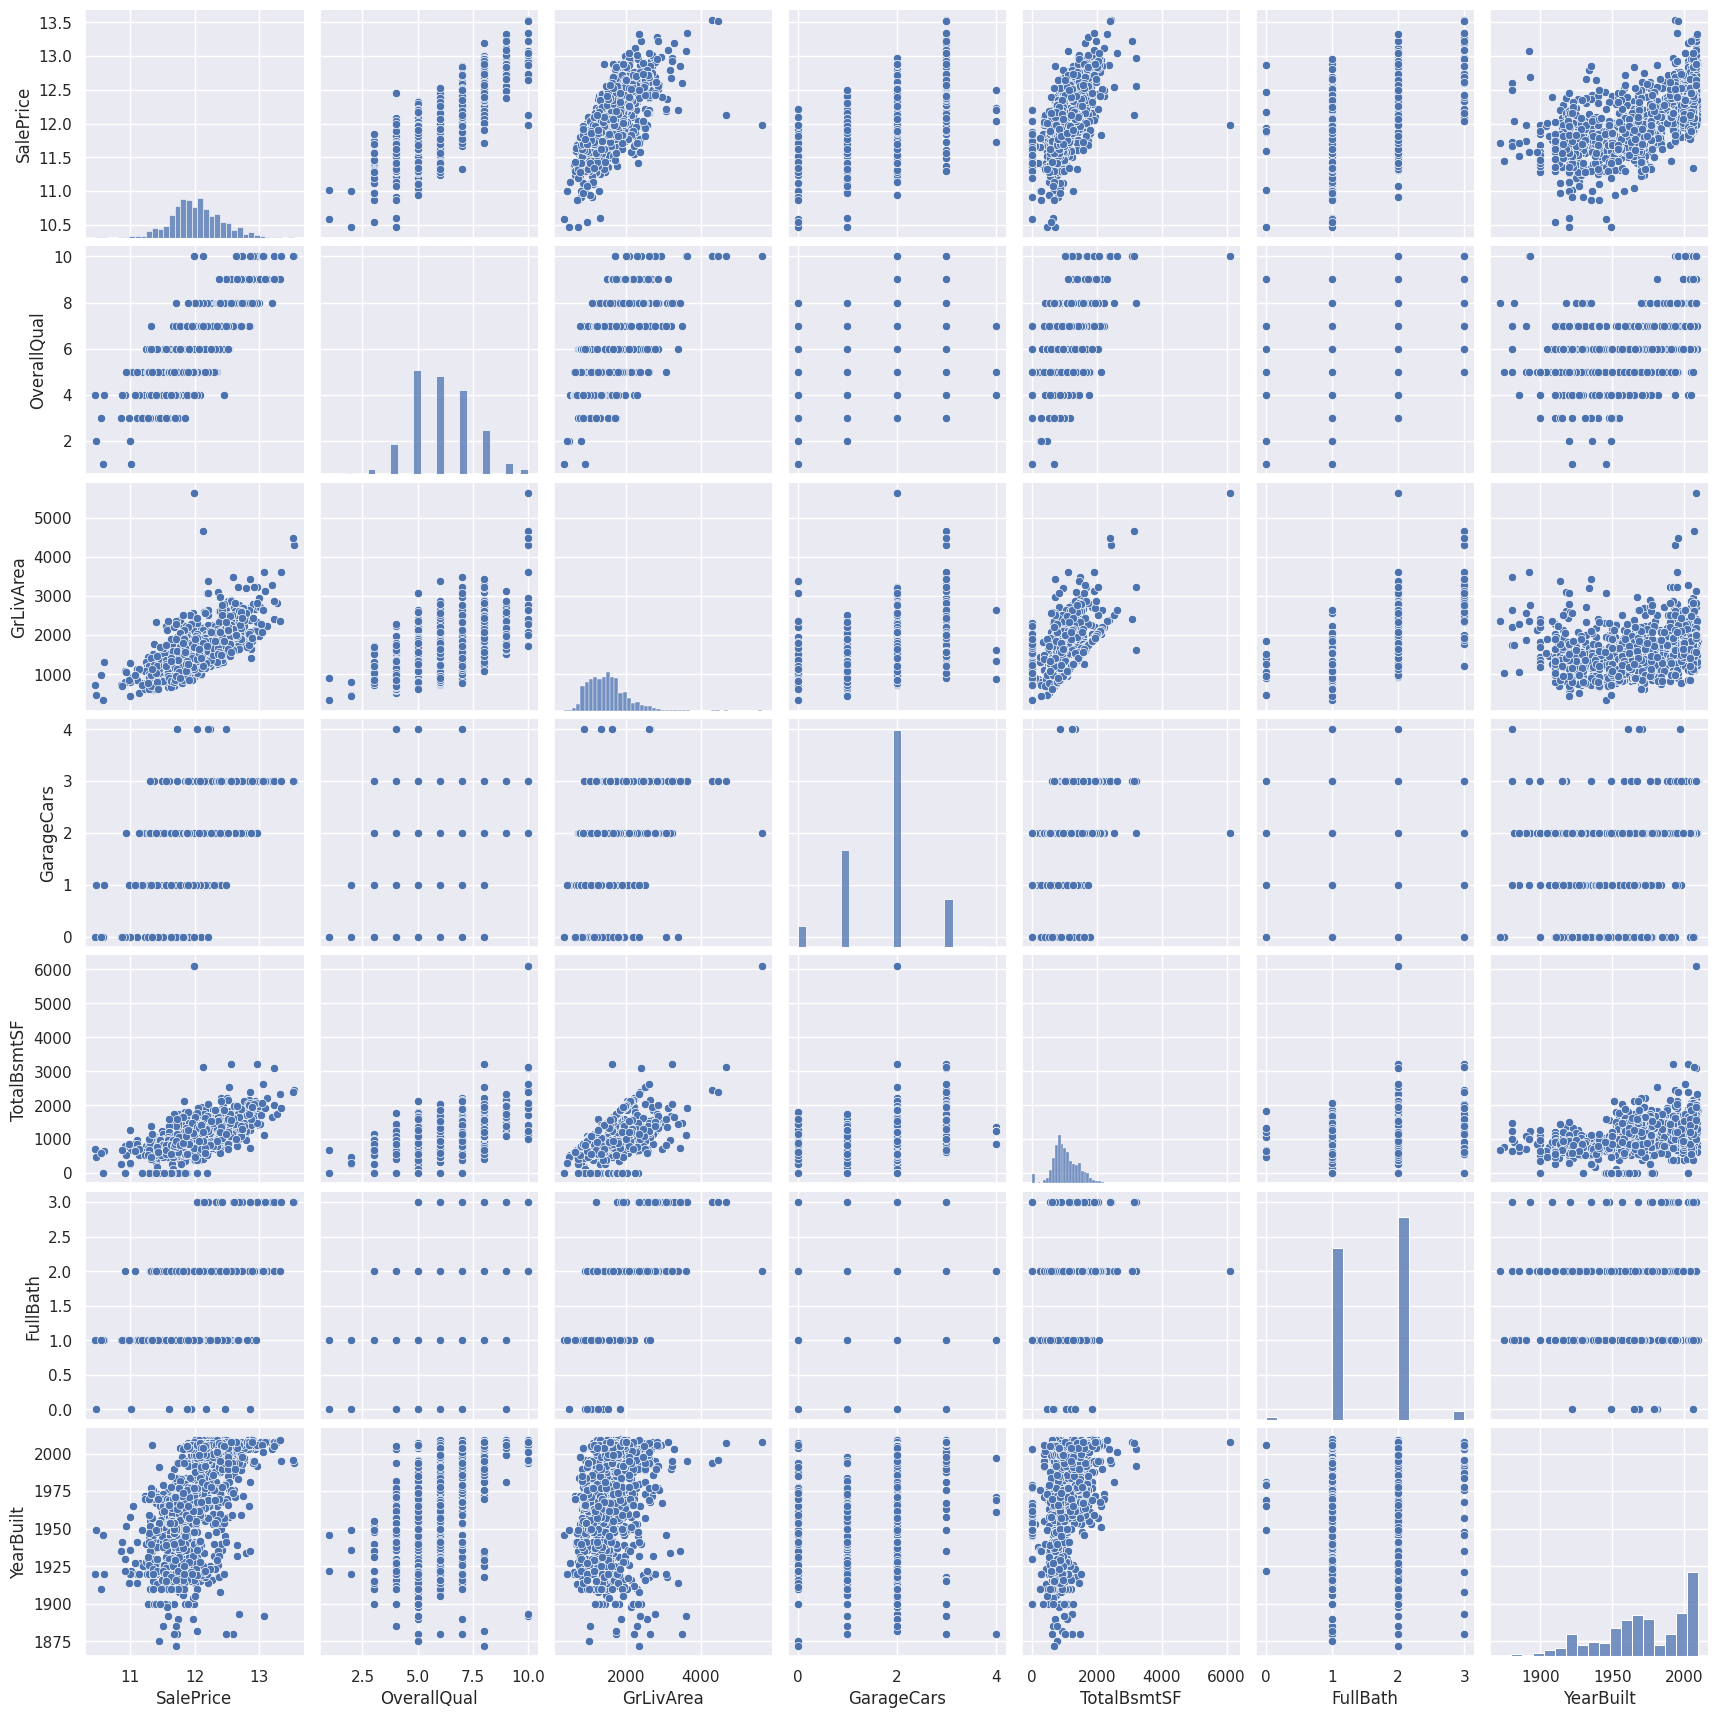

In [8]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [9]:
import plotly.graph_objects as go
# Filter out non-numeric columns for correlation matrix
numeric_df = df_train.select_dtypes(include=[np.number])

# Correlation heatmap
correlation_matrix = numeric_df.corr()

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdYlGn'  # Using Cividis colorscale
))

fig.update_layout(title='Correlation Heatmap', xaxis_nticks=36)
fig.show()

# Missing Data

In [10]:
print("Missing values:")
print(df_train.isnull().sum().sum())

Missing values:
7829


In [11]:
df_train_ID = df_train['Id']
df_train.drop("Id", axis=1, inplace=True)

In [12]:
# Separate features and target
X = df_train.drop(columns=['SalePrice'], axis=1)
y = df_train['SalePrice']

In [13]:
# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [14]:
from sklearn.impute import SimpleImputer
# Impute missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='median')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# Impute missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

print("Missing values after imputation:")
print(X.isnull().sum().sum())

Missing values after imputation:
0


In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_categorical = encoder.fit_transform(X[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

In [16]:
# Scale numeric columns
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(X[numeric_cols])
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols)

In [17]:
# Combine encoded and scaled features
X_processed = pd.concat([scaled_numeric_df, encoded_categorical_df], axis=1)

In [18]:
# Scale the target variable
target_scaler = StandardScaler()
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Training Model

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_scaled, test_size=0.2, random_state=42)

In [20]:
# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Predict on the test set
y_pred_scaled = rf_model.predict(X_test)

In [22]:
# Invert the scaling of the predictions
y_pred_log = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_pred = np.expm1(y_pred_log)

# Invert the scaling of the test target
y_test_log = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_test_original = np.expm1(y_test_log)

# Evaluate the model
mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 17578.72154425003
Mean Squared Error: 888118853.3711016
R² Score: 0.8842136788734056


In [23]:
# Save the model and preprocessing objects
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(numeric_imputer, 'numeric_imputer.pkl')
joblib.dump(categorical_imputer, 'categorical_imputer.pkl')
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(target_scaler, 'target_scaler.pkl')

['target_scaler.pkl']

# Prediction

In [24]:
df_test_ID = df_test['Id']
df_test.drop('Id', axis=1, inplace=True)

# Load the preprocessing objects
numeric_imputer = joblib.load('numeric_imputer.pkl')
categorical_imputer = joblib.load('categorical_imputer.pkl')
encoder = joblib.load('encoder.pkl')
scaler = joblib.load('scaler.pkl')
target_scaler = joblib.load('target_scaler.pkl')

In [25]:
# Identify numeric and categorical columns
numeric_cols = df_test.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_test.select_dtypes(include=['object']).columns

# Impute missing values for numeric columns
df_test[numeric_cols] = numeric_imputer.transform(df_test[numeric_cols])

# Impute missing values for categorical columns
df_test[categorical_cols] = categorical_imputer.transform(df_test[categorical_cols])

# Encode categorical columns
encoded_categorical = encoder.transform(df_test[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Scale numeric columns
scaled_numeric = scaler.transform(df_test[numeric_cols])
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols)

# Combine encoded and scaled features
X_new_processed = pd.concat([scaled_numeric_df, encoded_categorical_df], axis=1)

In [26]:
# Load the trained model
rf_model = joblib.load('rf_model.pkl')

# Predict using the trained model
predictions_scaled = rf_model.predict(X_new_processed)

# Invert the scaling of the predictions
predictions_log = target_scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

predictions = np.expm1(predictions_log)

# Combine predictions with 'Id' column
results = pd.DataFrame({'Id': df_test_ID, 'SalePrice': predictions})

# Save predictions to CSV file
results.to_csv('rf_predictions.csv', index=False)

print("Predictions saved to 'rf_predictions.csv'")

Predictions saved to 'rf_predictions.csv'


In [27]:
results

,Id,SalePrice
0,1461,125279.590498
1,1462,154287.382448
2,1463,180991.489831
3,1464,182608.720993
4,1465,193028.949397
...,...,...
1454,2915,88353.313322
1455,2916,89211.661262
1456,2917,155610.955644
1457,2918,116381.864398
